In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

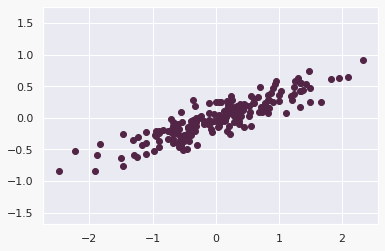

In [21]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
fig = plt.figure()
fig.patch.set_facecolor("#f8f8f8ff")
plt.scatter(X[:, 0], X[:, 1,], color="#522546")
plt.axis('equal')
fig.show()

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [16]:
print(pca.explained_variance_)


[0.7625315 0.0184779]


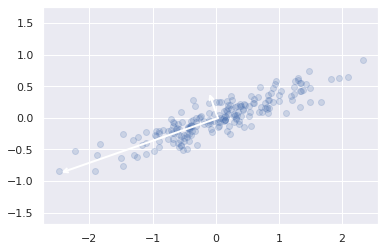

In [22]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [23]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


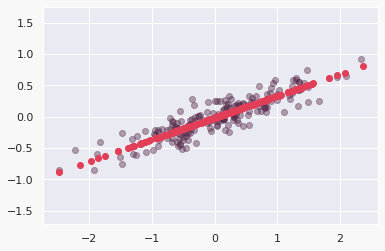

In [27]:
X_new = pca.inverse_transform(X_pca)
fig = plt.figure()
fig.patch.set_facecolor("#f8f8f8ff")
plt.scatter(X[:, 0], X[:, 1], alpha=0.4, color="#522546")
plt.scatter(X_new[:, 0], X_new[:, 1],  color="#E23E57" )
plt.axis('equal');

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [29]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


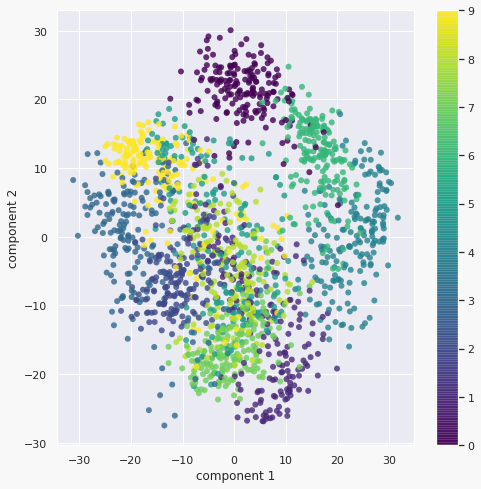

In [44]:
fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor("#f8f8f8ff")
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', 
            alpha=0.8, cmap ='viridis')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
fig.show()

Text(0, 0.5, 'cumulative explained variance')

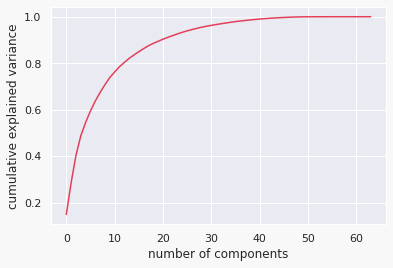

In [46]:
pca = PCA().fit(digits.data)
fig = plt.figure()
fig.patch.set_facecolor("#f8f8f8ff")
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="#E23E57")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')